In [2]:
#import packages
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import Matern

from sklearn.gaussian_process import GaussianProcessRegressor
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import sys
import GPy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


In [2]:
#read in data
raw_data = pd.read_csv("clean_data_7days.csv")
row_count = raw_data.shape[0]
processed=np.zeros((row_count,7))
processed[:,0] = raw_data["W/(C+P)"]
processed[:,1] = raw_data["%Fly Ash"]
processed[:,2] = 1-(raw_data["%Fly Ash"]+ raw_data["Coarse Agg Percentage"]+raw_data["Fine Agg Percentage"])
processed[:,3] = raw_data["Fine Agg Percentage"]
processed[:,4] = raw_data["AEA Dose (oz/cwt)"]
processed[:,5] = raw_data["TYPE AWRA Dose (oz/cwt)"]
processed[:,6] = raw_data["7 Day"]

#raw_std_y = np.std(y)
#raw_mean_y = np.mean(y)

In [3]:
X = raw_data
#X = raw_data.drop(['7 Day','28 Day'], axis=1)
scaler = StandardScaler()  
scaler.fit(X)
X = scaler.transform(X)
kf = KFold(n_splits=5,random_state=42,shuffle=True)
y7 = raw_data['7 Day']
scaler.fit(np.asarray([y7]).T)
kf.get_n_splits(X)
true_str=[]
pred_str=[]

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    kernel = GPy.kern.Exponential(input_dim=6)
    print(np.delete(X_train,[3,4], 1).shape)
    print(np.asarray([X_train[:,3]]).T.shape)
    #kernel = 1.0 * RationalQuadratic(length_scale=1, alpha=1) + WhiteKernel(noise_level=1)
    #gp = GaussianProcessRegressor(kernel=kernel,normalize_y=False, n_restarts_optimizer=5,alpha=0.2)
    #gp.fit(np.delete(X_train, -1, 1),X_train[:,-1])
    
    mm1 = GPy.models.GPRegression(np.delete(X_train,[3,4], 1),np.asarray([X_train[:,3]],dtype="float32").T,kernel)
    mm1.optimize()
   #print(X_test[:,3])
    c1 =gp.predict(np.delete(X_test,[3,4], 1))
    print(r2_score(np.asarray([X_test[:,3]]).T,c1))
    c=0.00689476*(scaler.inverse_transform(c1))
    pred_str.append(c)
    true_str.append(0.00689476*scaler.inverse_transform(np.asarray([X_test[:,3]])).T)
    
    
    

TRAIN: [   1    2    3 ... 7529 7530 7531] TEST: [   0    8   14 ... 7522 7526 7528]
(6025, 6)
(6025, 1)


NameError: name 'gp' is not defined

In [7]:
mm1.predict(np.delete(X_test,[3,4],1))
np.delete(X_test,[3,4],1)

NameError: name 'c1' is not defined

In [ ]:
y_train, y_test = y[train_index],y[test_index]
    kernel = GPy.kern.Exponential(input_dim=6)
    #kernel = 1.0 * RationalQuadratic(length_scale=1, alpha=1) + WhiteKernel(noise_level=1)
    #gp = GaussianProcessRegressor(kernel=kernel,normalize_y=False, n_restarts_optimizer=5,alpha=0.2)
    #gp.fit(np.delete(X_train, -1, 1),X_train[:,-1])
    mm1 = GPy.models.GPRegression(X_train,y_train,kernel)
    mm1.optimize()
    c1 =gp.predict(X_test)
    print(r2_score(y_test,c1))
    c=0.00689476*(scaler.inverse_transform(c1))
    pred_str.append(c)
    true_str.append(0.00689476*scaler.inverse_transform(X_test))

In [61]:
X = raw_data.drop(['7 Day','28 Day'], axis=1)
y7 = raw_data['7 Day']
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
    print(X[:,train_index[1]])
    print("Train Index: ", train_index[1])
    print("Test Index: ", test_index,"\n")


KFold(n_splits=5, random_state=None, shuffle=False)


TypeError: '(slice(None, None, None), 1508)' is an invalid key

In [10]:
#Using GPy package
scaler1 = StandardScaler() 
scaler2 = StandardScaler()  

X = raw_data.drop(['7 Day','28 Day'], axis=1)
y7 = raw_data['7 Day']
scaler1.fit(np.asarray([y7]).T)
y7 = scaler1.transform(np.asarray([y7]).T)
scaler2.fit(X)
XX = scaler2.transform(X)

kernel = GPy.kern.Exponential(input_dim=6)
X_train, X_test, y_train, y_test = train_test_split(XX, y7, test_size=0.3, random_state=42)
mm1 = GPy.models.GPRegression(X_train,y_train,kernel)
mm1.optimize()



NameError: name 'r2_score' is not defined

In [30]:
#5-fold CV using the GPy package
#scores_GPR = cross_validate(mm1, X_train, y_train, cv=5,scoring=('r2', 'neg_root_mean_squared_error'),return_train_score=True)
gpy_results = np.zeros([5,4])
gpy_results[1,2]=1141514
print(gpy_results)

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(XX, y7, test_size=0.3, random_state=i*10)
    mm1 = GPy.models.GPRegression(X_train,y_train,kernel)
    mm1.optimize()
    
    a1,a2=mm1.predict(X_test)
    a3,a4=mm1.predict(X_train)
    
    gpy_results[i-1,2] = r2_score(y_test,a1)
    gpy_results[i-1,0] = r2_score(y_train,a3)
    gpy_results[i-1,3] = 0.00689476*np.sqrt(mean_squared_error(y_test,a1))
    gpy_results[i-1,1] = 0.00689476*np.sqrt(mean_squared_error(y_train,a4))
    
    print("round ",i, " complete")



[[      0.       0.       0.       0.]
 [      0.       0. 1141514.       0.]
 [      0.       0.       0.       0.]
 [      0.       0.       0.       0.]
 [      0.       0.       0.       0.]]
round  1  complete
KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

In [98]:
#for testing purposes
#print(X_test)
#print("分割")
#print(X_train

test= shuffle(raw_data, random_state=42)
X = test.drop(['7 Day','28 Day'], axis=1)
scaler = StandardScaler()  
scaler.fit(X)
XX = scaler.transform(X)

y = test['7 Day']
y=np.array(y).reshape(-1,1)
scaler.fit(y)
yy=scaler.transform(y)
#yy=y


X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=42)
# kernel=ExpSineSquared(length_scale=1, periodicity=1)
kernel = 1.0 * RationalQuadratic(length_scale=1, alpha=1) + WhiteKernel(noise_level=1.5)
#kernel = DotProduct() + WhiteKernel()
#kernel =1.0 * Matern(length_scale=1.0, nu=1.5)+ WhiteKernel(noise_level=2.5)
#kernel = 1.0 * RBF(1.0)+WhiteKernel(noise_level=3.0)
gp5 = GaussianProcessRegressor(kernel=kernel,normalize_y=True, n_restarts_optimizer=0,alpha=0.2)
#gp5.fit(X_train, y_train)

In [90]:
print("R2 for training:")
print(gp5.score(X_train,y_train))
print("R2 for testing:")
print(gp5.score(X_test,y_test))
print((gp5.predict(X_train, return_std=True)[0]*raw_std_y)+raw_mean_y)
print(gp5.predict(X_train, return_std=True)[1]*raw_std_y)

print((gp5.predict(X_test, return_std=True)[0]*raw_std_y)+raw_mean_y)
print(gp5.predict(X_test, return_std=True)[1]*raw_std_y)


R2 for training:
0.6976511719302552
R2 for testing:
0.644195423272687
[[3420.2115875 ]
 [3647.28575635]
 [5868.34761   ]
 ...
 [3588.58052673]
 [3948.05717694]
 [3716.8672416 ]]
[333.41633467 331.44088261 354.40904183 ... 335.66431166 325.8961402
 335.28776525]
[[3918.38255758]
 [4287.88340564]
 [3815.904168  ]
 ...
 [3916.64063423]
 [3889.16404972]
 [3917.47933096]]
[348.44126538 332.21753004 373.2078887  ... 360.40294137 341.13385078
 337.45911636]


In [3]:
test= shuffle(raw_data, random_state=42)
test = test.drop(['7 Day','28 Day'],axis=1)
test = np.asarray(test)
test

    

NameError: name 'raw_data' is not defined

In [ ]:
Xt = np.zeros((100,6))
for i in range(0,100):
    Xt[i,0]=np.mean(test[:,0])
    #Xt[i,0]=(np.max(test[:,0])-np.min(test[:,0]))/100*i
    
    Xt[i,1]=np.mean(test[:,1])
    #Xt[i,1]=((np.max(test[:,1])-np.min(test[:,1]))/100*i)
    
    Xt[i,2]=np.mean(test[:,2])
    #Xt[i,2]=0.25+((np.max(test[:,2])-np.min(test[:,2]))/100*i)
    
    Xt[i,3]=np.mean(test[:,3])
    #Xt[i,3]=25+((np.max(test[:,3])-np.min(test[:,3]))/100*i)
    
    #Xt[i,4]=np.mean(test[:,4])
    Xt[i,4]=((np.max(test[:,4])-np.min(test[:,4]))/100*i)
    
    Xt[i,5]=np.mean(test[:,5])
    #Xt[i,5]=((np.max(test[:,5])-np.min(test[:,5]))/100*i)
    
    
scaler.fit(test)
XXt = scaler.transform(Xt)
#gp5.predict(XXt,return_std =True)

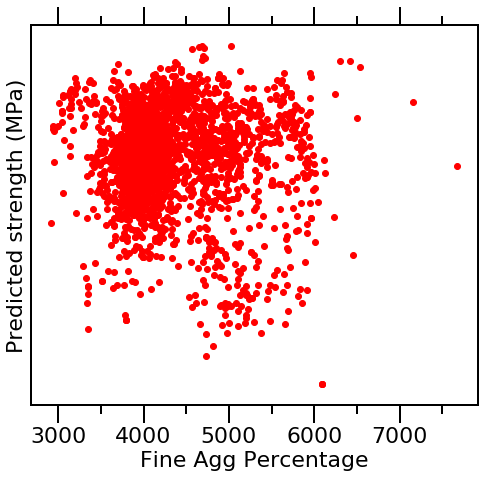

In [378]:
fig=plt.figure(figsize=(8,7))
ax=plt.axes()



Xt_target = gp5.predict(X_test,return_std=True)[0]


#plt.scatter(strength,cost)

predict_mean_train = (gp5.predict(X_train, return_std=True)[0]*raw_std_y)+raw_mean_y)*0.00689
predict_std_train = gp5.predict(X_train,return_std=True)[1]* raw_std_y *0.00689

predict_mean_test = (gp5.predict(X_test, return_std=True)[0]*raw_std_y)+raw_mean_y)*0.00689
predict_std_test = gp5.predict(X_test,return_std=True)[1]* raw_std_y *0.00689


plt.scatter(Xt_target,predict_mean,c='red')
#plt.fill_between(Xt_target,predict_mean-predict_std,predict_mean+predict_std,alpha=0.1,label="std")

ax.minorticks_on()
ax.tick_params('both',top=True,right=True,  bottom=True, left =True,length=18, width=2, which='major',labelsize=22)
ax.tick_params('both', top=True,right=True, bottom=True, left =True,length=9,width=2,  which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.rc('legend',fontsize=25) 
plt.xlabel('Fine Agg Percentage',fontsize=22,family='Helvetica')
plt.ylabel('Predicted strength (MPa)',fontsize=22,family='Helvetica')
#plt.xlim(3000,5000)
#plt.ylim(400,500)

font = matplotlib.font_manager.FontProperties(family='Helvetica',size=22)

In [141]:

y_train_1 = y_train
X_test_1 = X_test
y_test_1 = y_test
train_rowcount = X_train.shape[0]
test_rowcount = X_test.shape[0] 

X_train_1_divide = (np.max(X_train_1[:,0])-np.min(X_train_1[:,0]))/train_rowcount

for i in range(0,train_rowcount):
    X_train_1[i,0] = i*X_train_1_divide
    





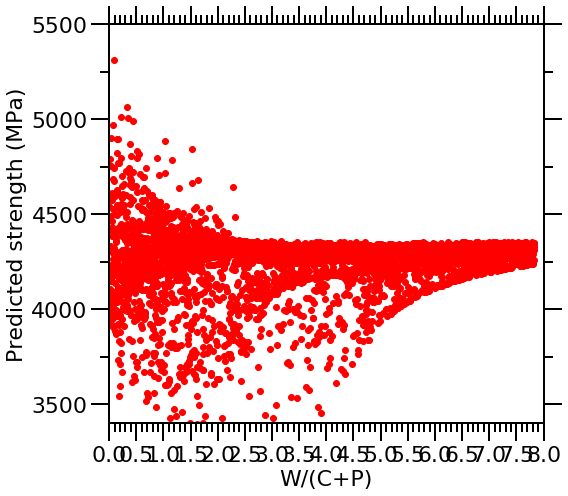

In [160]:

fig=plt.figure(figsize=(8,7))
ax=plt.axes()
s2=[50,40,36]
#plt.scatter(strength,cost)
plt.scatter(X_train_1[:,0],gp5.predict(X_train_1),c='red')

ax.minorticks_on()
ax.tick_params('both',top=True,right=True,  bottom=True, left =True,length=18, width=2, which='major',labelsize=22)
ax.tick_params('both', top=True,right=True, bottom=True, left =True,length=9,width=2,  which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(250))
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.rc('legend',fontsize=25) 
plt.xlabel('W/(C+P)',fontsize=22,family='Helvetica')
plt.ylabel('Predicted strength (MPa)',fontsize=22,family='Helvetica')
plt.xlim(0,8)
plt.ylim(3400,5500)

font = matplotlib.font_manager.FontProperties(family='Helvetica',size=22)
#ax.legend(labelspacing=0.2,prop=font,frameon=False,loc='upper left')
plt.tight_layout()
fig.savefig('a.pdf')
plt.show()